In [23]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scanpy as sc

In [24]:
panelist_data = np.loadtxt("data/vlb_data_combined.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
#panelist_data

In [29]:
'''k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(panelist_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(panelist_data[:, 0], panelist_data[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X')
plt.xlabel('feature 1')
plt.ylabel('flavour intensities')
plt.title('KMeans Clustering')
plt.show()'''

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### UMAP

In [14]:
import umap
from umap import UMAP
import sklearn.cluster as cluster

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Franz\AppData\Local\Programs\Python\Python39\

In [31]:
standard_umap = UMAP(random_state=42).fit_transform(panelist_data)

In [39]:
n_clusters=10
kmeans_labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(panelist_data)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


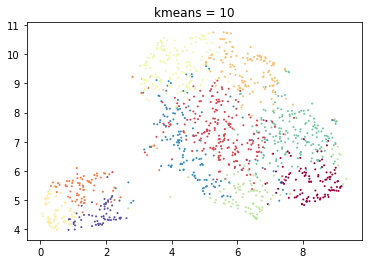

In [40]:
# kmeans = 10
plt.title("kmeans = 10")
plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=1, cmap='Spectral');


In [52]:
def plot_umap(file, n_clusters):
    standard_umap = UMAP(random_state=42).fit_transform(file)
    n_clusters=n_clusters
    kmeans_labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(file)
    plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');
    plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=1, cmap='Spectral');


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


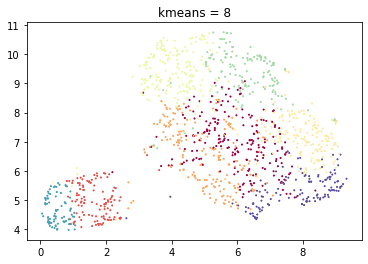

In [53]:
plt.title("kmeans = 8")
plot_umap(panelist_data, 8)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


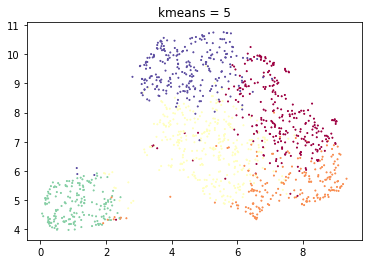

In [54]:
plt.title("kmeans = 5")
plot_umap(panelist_data, 5)

### kmeans and Pca

In [65]:
import pandas as pd
import seaborn as sns


In [70]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',')
panelist_data_df

,panelist,samplekey,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste,date
0,1,000656,50,20,60,50,30,30,50,40,40,2023-01-12
1,1,000657,30,40,60,40,40,30,10,30,60,2023-01-12
2,1,000658,30,50,50,50,40,40,10,40,70,2023-01-12
3,1,000661,60,70,60,50,50,60,0,40,60,2023-01-12
4,1,000662,40,60,50,50,50,40,0,30,60,2023-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1241,3,000926,40,30,40,40,30,20,40,20,60,2022-10-17
1242,3,000927,40,70,60,70,40,50,0,40,80,2022-10-17
1243,3,000929,20,60,30,40,30,50,0,40,30,2022-10-17
1244,3,000930,10,30,60,70,30,70,0,40,60,2022-10-17


<AxesSubplot:xlabel='aftertaste'>

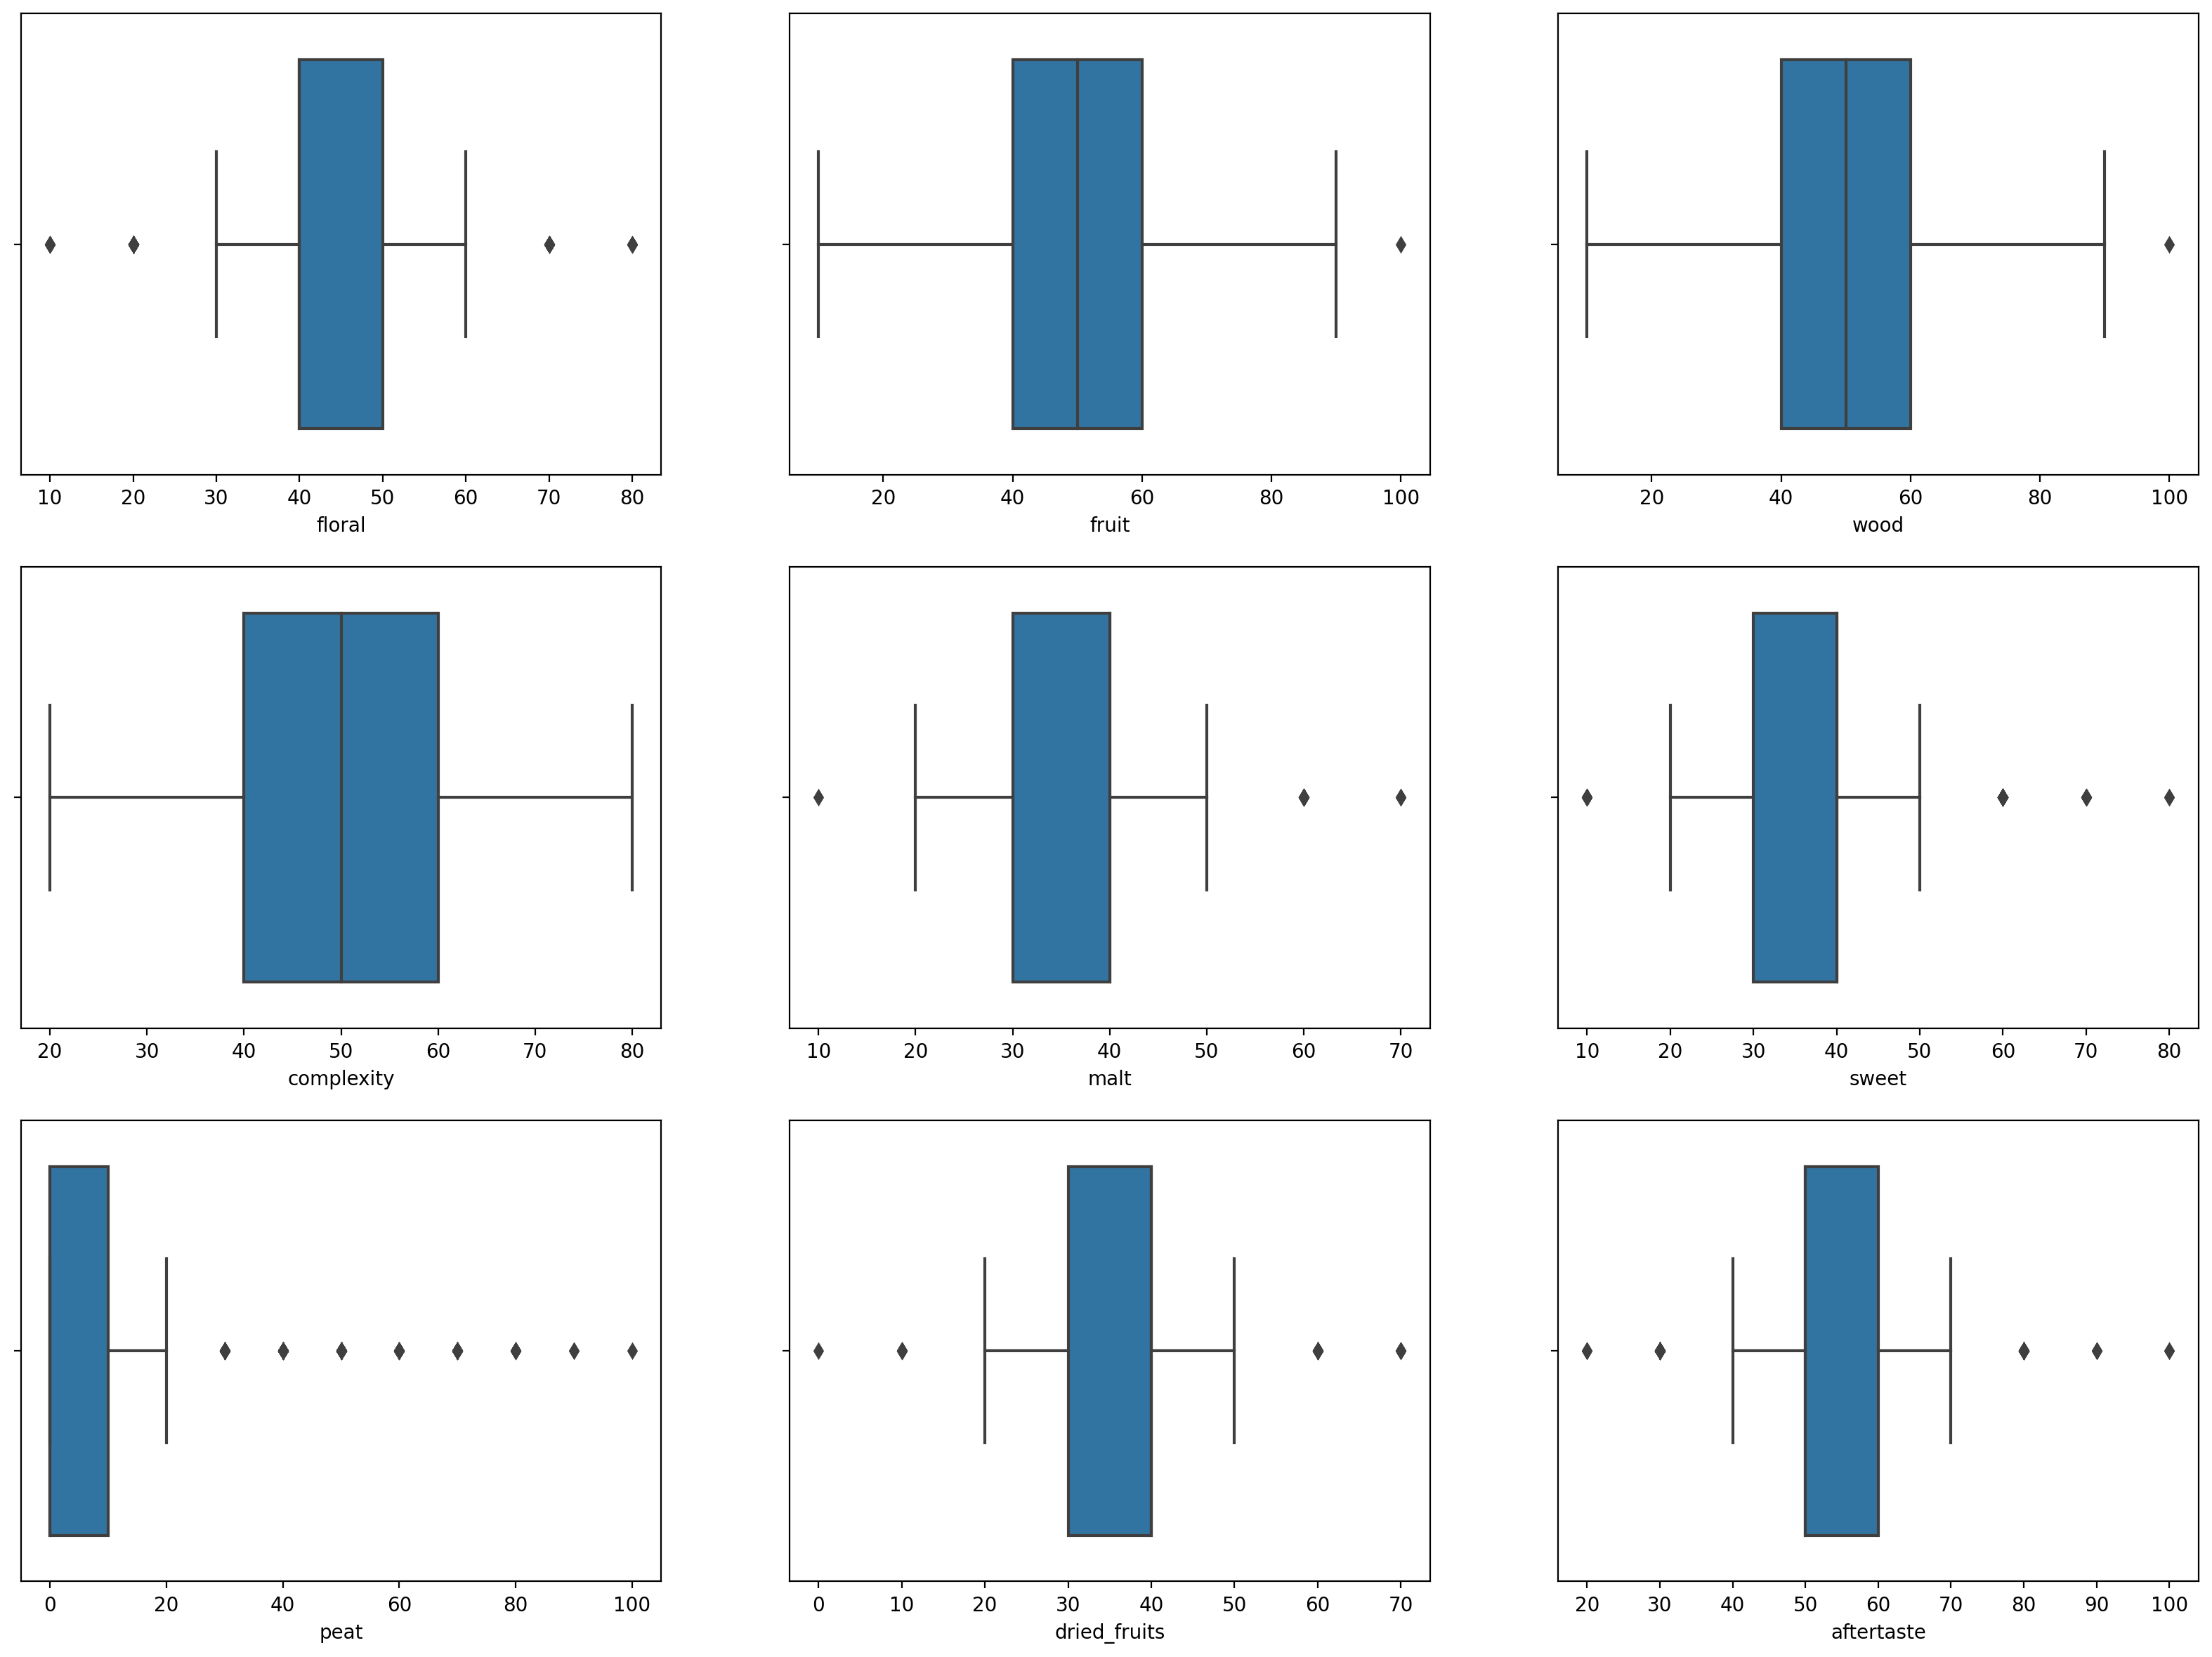

In [69]:

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'floral', data = panelist_data_df)

plt.subplot(4,3,2)
sns.boxplot(x = 'fruit', data = panelist_data_df)

plt.subplot(4,3,3)
sns.boxplot(x = 'wood', data = panelist_data_df)

plt.subplot(4,3,4)
sns.boxplot(x = 'complexity', data = panelist_data_df)

plt.subplot(4,3,5)
sns.boxplot(x = 'malt', data = panelist_data_df)

plt.subplot(4,3,6)
sns.boxplot(x = 'sweet', data = panelist_data_df)

plt.subplot(4,3,7)
sns.boxplot(x = 'peat', data = panelist_data_df)

plt.subplot(4,3,8)
sns.boxplot(x = 'dried_fruits', data = panelist_data_df)

plt.subplot(4,3,9)
sns.boxplot(x = 'aftertaste', data = panelist_data_df)

# histogram / density plot

In [81]:
X = panelist_data_df.drop('panelist',axis = 1)  
X = X.drop('samplekey',axis = 1)  
X = X.drop('date',axis = 1)  

y = panelist_data_df['samplekey']

X


,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
0,50,20,60,50,30,30,50,40,40
1,30,40,60,40,40,30,10,30,60
2,30,50,50,50,40,40,10,40,70
3,60,70,60,50,50,60,0,40,60
4,40,60,50,50,50,40,0,30,60
...,...,...,...,...,...,...,...,...,...
1241,40,30,40,40,30,20,40,20,60
1242,40,70,60,70,40,50,0,40,80
1243,20,60,30,40,30,50,0,40,30
1244,10,30,60,70,30,70,0,40,60


In [82]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5,:5]

array([[ 0.71923193, -1.92782017,  0.73083586,  0.1003848 , -0.63164252],
       [-1.11528799, -0.44277292,  0.73083586, -0.80598808,  0.49428964],
       [-1.11528799,  0.29975071, -0.05014311,  0.1003848 ,  0.49428964],
       [ 1.63649189,  1.78479796,  0.73083586,  0.1003848 ,  1.62022181],
       [-0.19802803,  1.04227434, -0.05014311,  0.1003848 ,  1.62022181]])

In [83]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
0,0.719232,-1.927820,0.730836,0.100385,-0.631643,-0.689731,1.951986,0.393120,-1.117371
1,-1.115288,-0.442773,0.730836,-0.805988,0.494290,-0.689731,-0.084585,-0.592448,0.500577
2,-1.115288,0.299751,-0.050143,0.100385,0.494290,0.236352,-0.084585,0.393120,1.309551
3,1.636492,1.784798,0.730836,0.100385,1.620222,2.088518,-0.593727,0.393120,0.500577
4,-0.198028,1.042274,-0.050143,0.100385,1.620222,0.236352,-0.593727,-0.592448,0.500577


<AxesSubplot:>

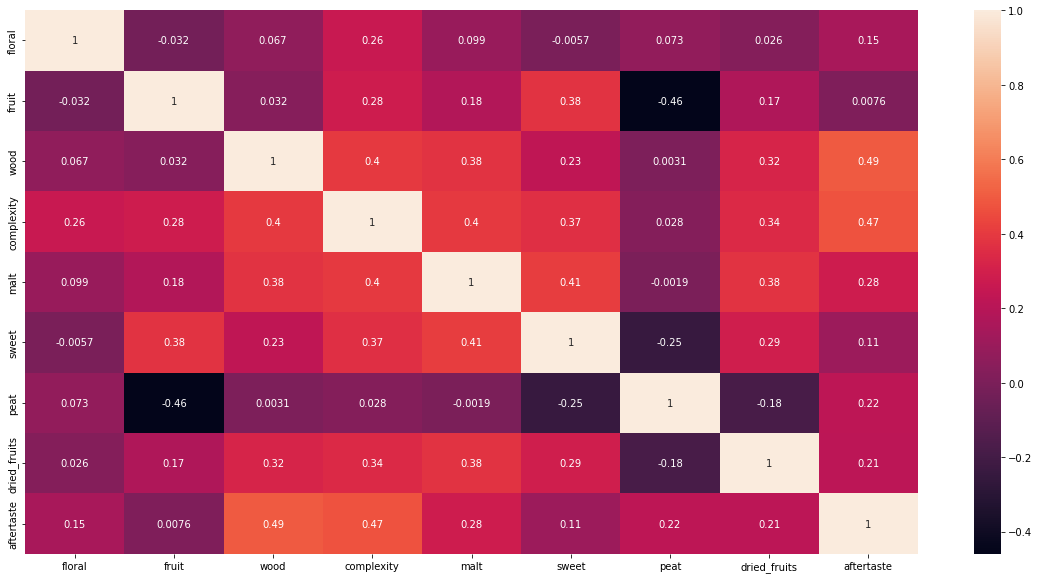

In [84]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [91]:
# perform pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled_df)

PCA()

In [92]:
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
pca.explained_variance_ratio_

array([0.31706758, 0.19110493, 0.11153602, 0.08623411, 0.08466184,
       0.06690275, 0.05710739, 0.045114  , 0.04027138])

Text(0, 0.5, 'cumulative explained variance')

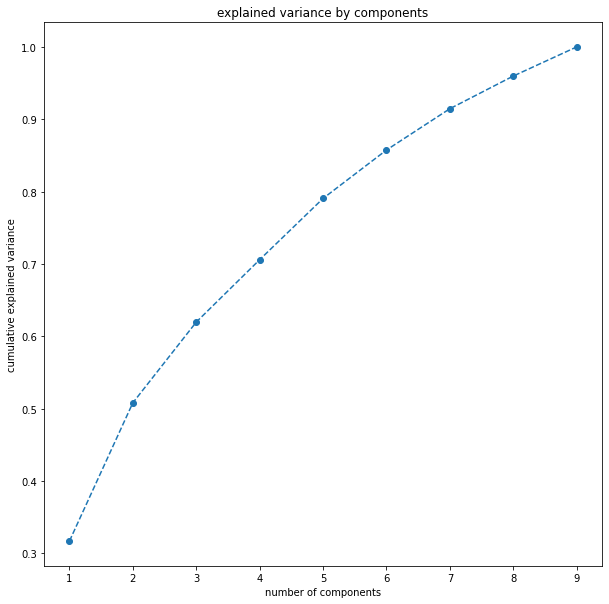

In [97]:
plt.figure(figsize=(10,10))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# presereve 80 % of variance so 5 components

In [99]:
pca = PCA(n_components=5)
pca.fit(X_scaled)

scores_pca = pca.transform(X_scaled)
scores_pca

array([[-0.99184467,  2.19833975, -0.07802321,  1.30704101, -0.48165906],
       [-0.41298144,  0.45124517, -1.39166466, -0.51515207, -0.04123191],
       [ 0.85471008, -0.03035282, -1.0924411 , -0.585151  ,  0.29014368],
       ...,
       [-1.28989903, -3.00512619, -1.09832957,  0.55375463,  0.88838407],
       [ 1.70988384, -0.81296435, -2.58695004, -0.61249006,  1.30947712],
       [-0.57263916,  1.9773861 , -0.09935771, -0.43313809,  0.50087092]])

In [100]:
# how many clusters? 

wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i,init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Text(0, 0.5, 'wcss')

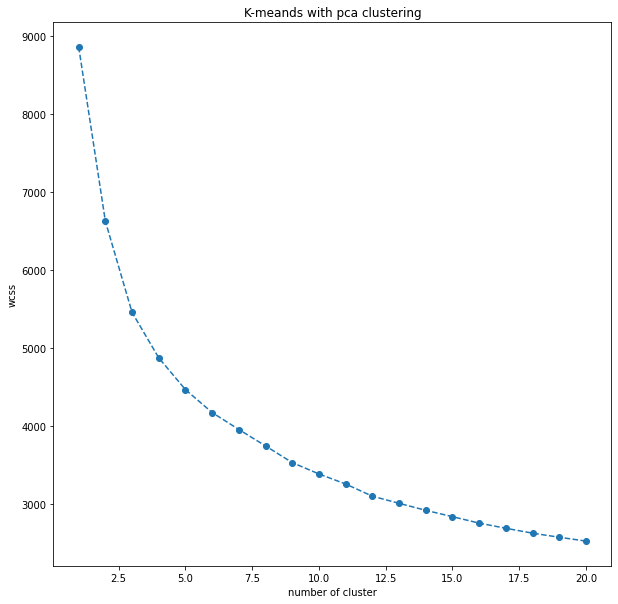

In [101]:
plt.figure(figsize=(10,10))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.title('K-meands with pca clustering')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
# between 4 or 5 clusters


In [102]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [107]:
# create new dataframe
df_pca_kmeans = pd.concat([X_scaled_df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-5:] = ['component 1', 'component 2', 'component 3','component 4', 'component 5']
df_pca_kmeans['kmeans PCA'] = kmeans_pca.labels_

In [109]:
df_pca_kmeans['color'] = df_pca_kmeans['kmeans PCA'].map({0: 'first', 1:'second', 2:'third', 3:'fourth'})

In [110]:
df_pca_kmeans

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste,component 1,component 2,component 3,component 4,component 5,kmeans PCA,color
0,0.719232,-1.927820,0.730836,0.100385,-0.631643,-0.689731,1.951986,0.393120,-1.117371,-0.991845,2.198340,-0.078023,1.307041,-0.481659,0,first
1,-1.115288,-0.442773,0.730836,-0.805988,0.494290,-0.689731,-0.084585,-0.592448,0.500577,-0.412981,0.451245,-1.391665,-0.515152,-0.041232,1,second
2,-1.115288,0.299751,-0.050143,0.100385,0.494290,0.236352,-0.084585,0.393120,1.309551,0.854710,-0.030353,-1.092441,-0.585151,0.290144,1,second
3,1.636492,1.784798,0.730836,0.100385,1.620222,2.088518,-0.593727,0.393120,0.500577,2.781737,-1.110265,1.278258,0.517223,0.644124,2,third
4,-0.198028,1.042274,-0.050143,0.100385,1.620222,0.236352,-0.593727,-0.592448,0.500577,1.026344,-0.699069,0.040698,-0.207585,0.853526,1,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,-0.198028,-1.185297,-0.831122,-0.805988,-0.631643,-1.615814,1.442843,-1.578016,0.500577,-2.398223,1.945241,-0.074425,-0.508673,0.566587,0,first
1242,-0.198028,1.784798,0.730836,1.913131,0.494290,1.162435,-0.593727,0.393120,2.118525,3.125113,-0.421332,0.207126,-1.750588,0.572342,2,third
1243,-2.032548,1.042274,-1.612101,-0.805988,-0.631643,1.162435,-0.593727,0.393120,-1.926345,-1.289899,-3.005126,-1.098330,0.553755,0.888384,3,fourth
1244,-2.949808,-1.185297,0.730836,1.913131,-0.631643,3.014601,-0.593727,0.393120,0.500577,1.709884,-0.812964,-2.586950,-0.612490,1.309477,2,third


In [131]:
df_pca_kmeans['color'][0]

'first'

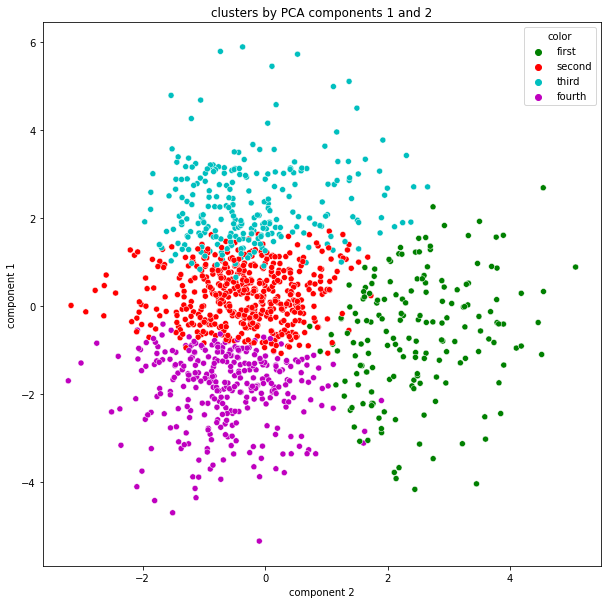

In [135]:
x_axis = df_pca_kmeans['component 2']
y_axis = df_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans['color'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2')
plt.show()

# check differences between panelists

In [9]:
'''with open('panelist_1.txt', 'w') as f:
    for line in lines :
        if line.startswith('1'):
            f.write(line)

with open('panelist_2.txt', 'w') as f:
    for line in lines :
        if line.startswith('2'):
            f.write(line)

with open('panelist_3.txt', 'w') as f:
    for line in lines :
        if line.startswith('3'):
            f.write(line)'''

In [10]:
panelist_1 = np.loadtxt("data/panelist_1.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
panelist_2 = np.loadtxt("data/panelist_2.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
panelist_3 = np.loadtxt("data/panelist_3.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


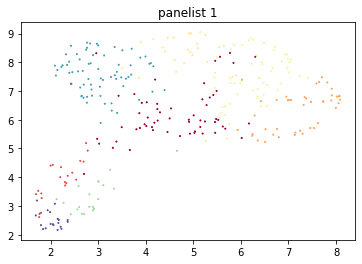

In [57]:
plt.title("panelist 1")
plot_umap(panelist_1, 8)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


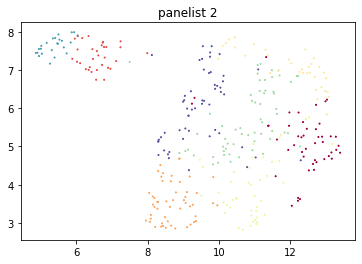

In [58]:
plt.title("panelist 2")
plot_umap(panelist_2, 8)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


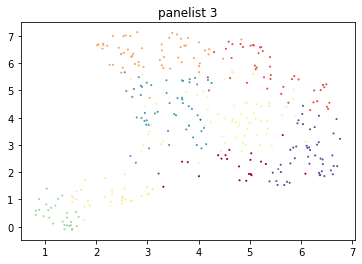

In [59]:
plt.title("panelist 3")
plot_umap(panelist_3, 8)